<a href="https://colab.research.google.com/github/SAIRAMYADAV21/SAI21/blob/main/IBM_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import re
import nltk
import spacy

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Added this line

nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))

# Load dataset
df = pd.read_csv("7817_1.csv")

# Cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z ]', '', text)

    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]

    return " ".join(words)

df['cleaned_review'] = df['reviews.text'].apply(clean_text)

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight,cleaned_review
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams,initially trouble deciding paperwhite voyage r...
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams,allow preface little history casual reader own...
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams,enjoying far great reading original fire since...
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams,bought one first paperwhites pleased constant ...
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams,say upfront dont like coroporate hermetically ...


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review'])


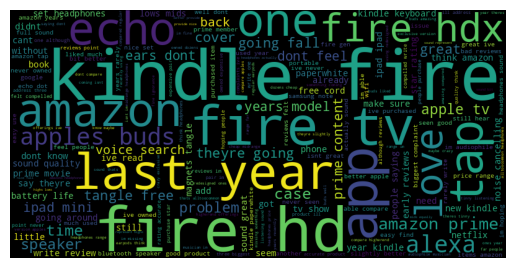

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['cleaned_review'])

wordcloud = WordCloud(width=800, height=400).generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [22]:
from sklearn.feature_extraction.text import CountVectorizer

bigram = CountVectorizer(ngram_range=(2,2), max_features=10)
X2 = bigram.fit_transform(df['cleaned_review'])

print(bigram.get_feature_names_out())


['amazon prime' 'apple tv' 'apples buds' 'fire hd' 'fire hdx' 'fire tv'
 'going fall' 'kindle fire' 'last years' 'like theyre']


In [23]:
def convert_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

df['sentiment'] = df['reviews.rating'].apply(convert_sentiment)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

    Negative       0.71      0.44      0.54       101
     Neutral       0.44      0.35      0.39        23
    Positive       0.75      0.92      0.83       196

    accuracy                           0.73       320
   macro avg       0.64      0.57      0.59       320
weighted avg       0.72      0.73      0.71       320



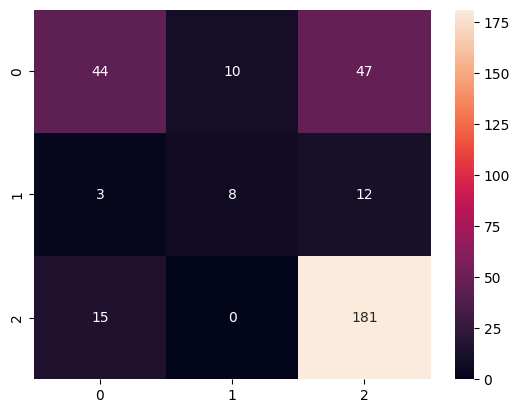

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, fmt='d')
plt.show()


In [26]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5)
lda.fit(X)

for index, topic in enumerate(lda.components_):
    print(f"Topic {index}")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic 0
['good', 'use', 'music', 'alexa', 'love', 'sound', 'speaker', 'echo', 'great', 'tap']
Topic 1
['sling', 'made', 'kids', 'excellent', 'dots', 'tv', 'movies', 'top', 'genre', 'prime']
Topic 2
['power', 'previous', 'leds', 'hard', 'kindle', 'skin', 'plastic', 'tight', 'hdx', 'blue']
Topic 3
['looking', 'amazon', 'videos', 'titles', 'youre', 'im', 'movies', 'hdx', 'prime', 'comcast']
Topic 4
['amazon', 'ive', 'tablet', 'one', 'tv', 'im', 'headphones', 'like', 'fire', 'kindle']


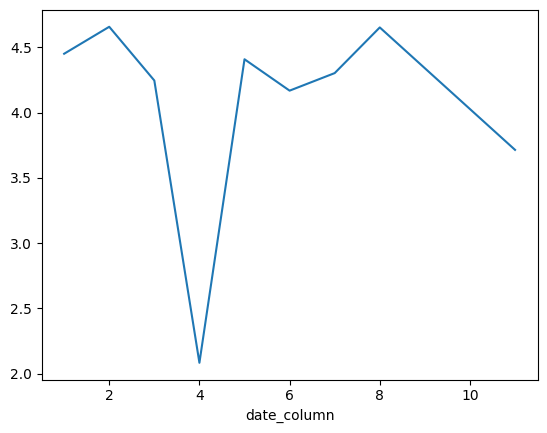

In [27]:
df['date_column'] = pd.to_datetime(df['dateAdded'])
df.groupby(df['date_column'].dt.month)['reviews.rating'].mean().plot()
plt.show()

In [28]:
doc = nlp(df['reviews.text'][0])

for ent in doc.ents:
    print(ent.text, ent.label_)


300 CARDINAL
80 dollar MONEY
a week DATE
Amazon ORG
Extra NORP
third ORDINAL


In [29]:
# 300            → CARDINAL
# 80 dollar      → MONEY
# a week         → DATE
# Amazon         → ORG
# Extra          → NORP
# third          → ORDINAL